<a href="https://colab.research.google.com/github/amoheric/Data-Science-Projects/blob/main/Linear_Regression_model_Week_3_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset into a pandas dataframe and answer the following questions:

In [ ]:
import pandas as pd

# Load the dataset from the provided file path
file_path = '/content/diabetes.txt'
df = pd.read_csv(file_path, delimiter='\t')

# Display the structure of the dataset
print("Dataset Structure:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())


Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB
None

First few rows of the dataset:
   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0

Describe the structure of the diabetes dataset (size,features, data types)

In [ ]:
#Code here
# Describe the structure
dataset_size = df.shape
features = df.columns
data_types = df.dtypes

print(f"Dataset Size: {dataset_size}")
print(f"Features: {features}")
print(f"Data Types: {data_types}")


Dataset Size: (442, 11)
Features: Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')
Data Types: AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object


Show the relationships between the target variable and the features using scatter plot and correlation analysis.

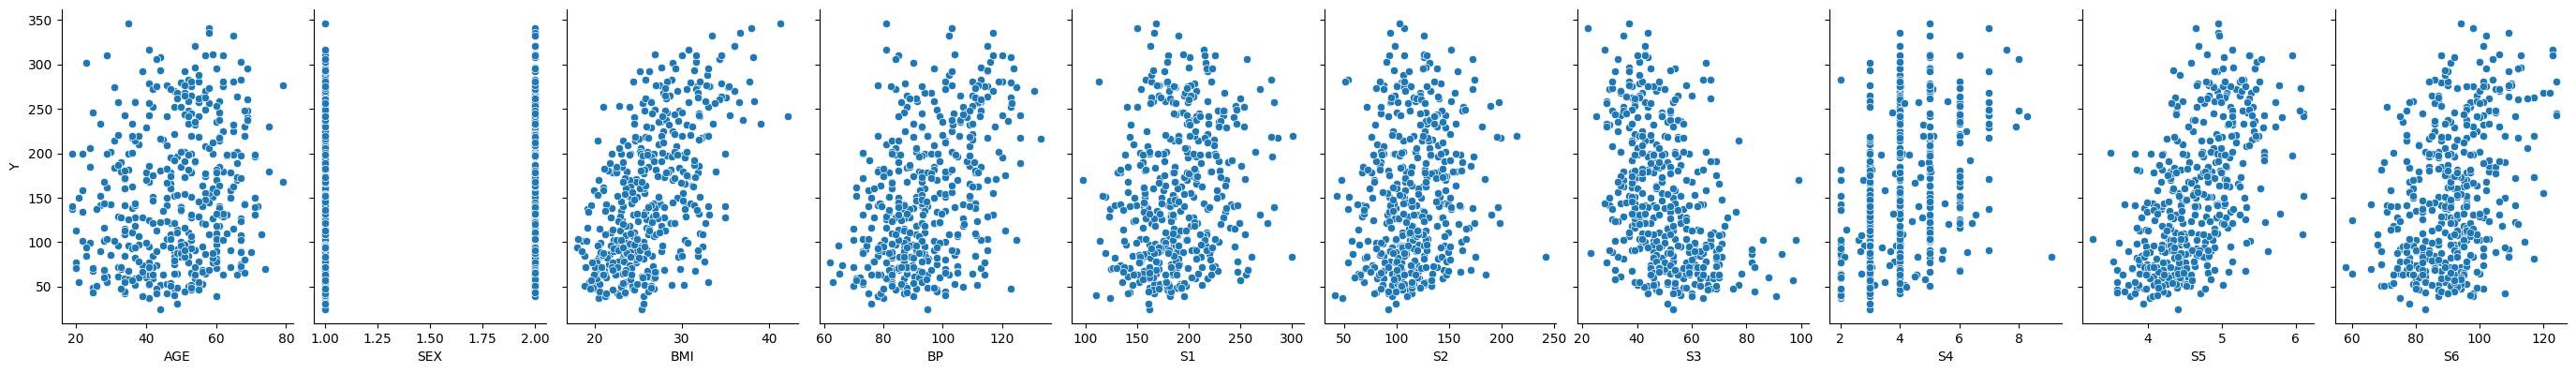

Correlation Matrix:
          AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Y    0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

           S4        S5        S6         Y  
AGE  0.20

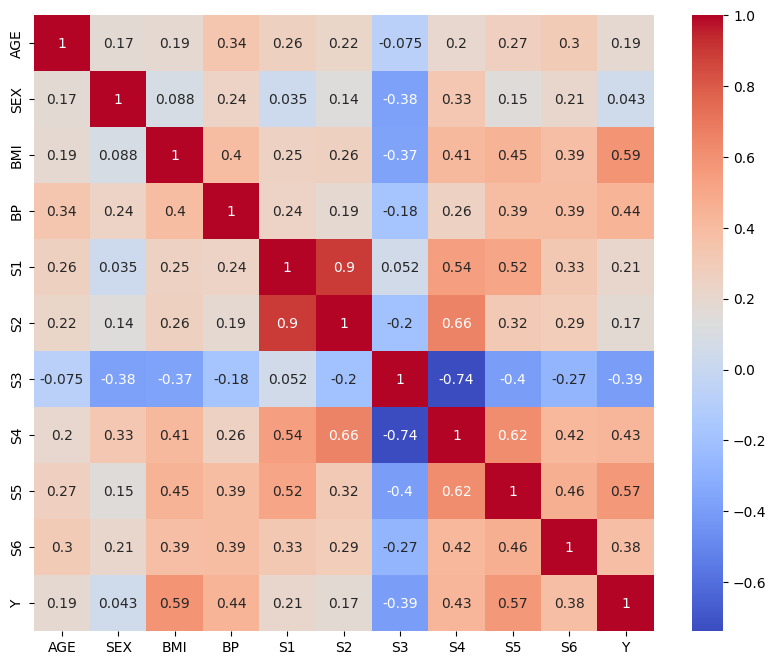

In [ ]:
#Code here

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.pairplot(df, x_vars=['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'], y_vars='Y', height=4, aspect=0.7)
plt.show()

# Correlation analysis
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()








---





Build a Simple Linear Regression Model (Single Feature):

1. Choose a single feature (body mass index) as the predictor variable and the s6 glu, blood sugar level as the target variable.

2. Split the dataset into training and testing sets.

3. Train a simple linear regression model using the training data.

4. Evaluate the model's accuracy using metrics such as mean squared error (MSE) or R-squared on both the training and testing sets.

5. Visualize the actual vs. predicted values of the target variable on the testing set.

Single Feature Model (BMI): Train MSE = 3854.11265207582, Test MSE = 4061.8259284949268
Single Feature Model (BMI): Train R2 = 0.3657241273794126, Test R2 = 0.23335039815872138


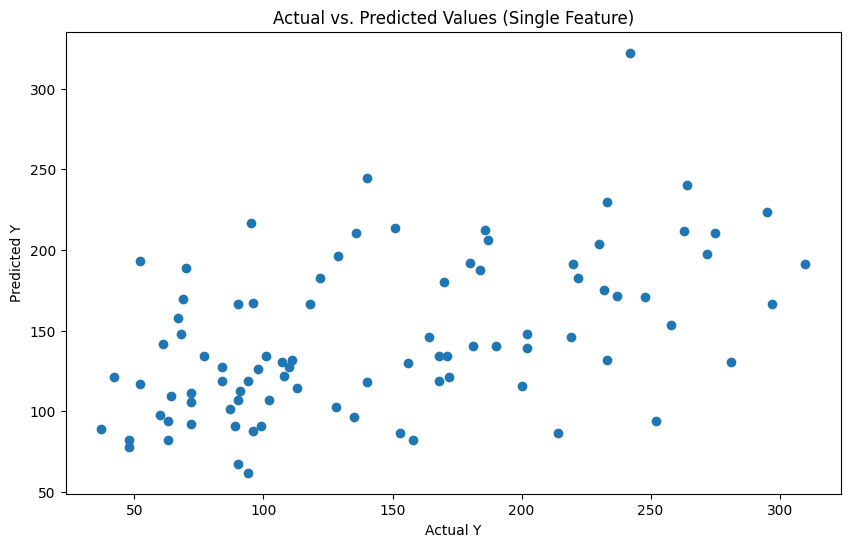

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Choose a single feature (BMI) and target variable (Y)
X_single = df[['BMI']]
y = df['Y']

# Split the dataset
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, y, test_size=0.2, random_state=42)

# Train the model
model_single = LinearRegression()
model_single.fit(X_train_single, y_train_single)

# Predict and evaluate
y_pred_train_single = model_single.predict(X_train_single)
y_pred_test_single = model_single.predict(X_test_single)

mse_train_single = mean_squared_error(y_train_single, y_pred_train_single)
mse_test_single = mean_squared_error(y_test_single, y_pred_test_single)
r2_train_single = r2_score(y_train_single, y_pred_train_single)
r2_test_single = r2_score(y_test_single, y_pred_test_single)

print(f"Single Feature Model (BMI): Train MSE = {mse_train_single}, Test MSE = {mse_test_single}")
print(f"Single Feature Model (BMI): Train R2 = {r2_train_single}, Test R2 = {r2_test_single}")

# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_single, y_pred_test_single)
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs. Predicted Values (Single Feature)")
plt.show()







---



Build a Simple Linear Regression Model (Two Features):

1.Select two features (body mass index and age in years) as predictor variables and the s6 glu, blood sugar level as the target variable.

2.Split the dataset into training and testing sets.
Train a simple linear regression model using the training data.

3.Assess the model's accuracy using metrics such as MSE or R-squared on both the training and testing sets.

4.Visualize the actual vs. predicted values of the target variable on the testing set.

Two Feature Model (BMI, AGE): Train MSE = 3808.8578632933104, Test MSE = 4052.775428111814
Two Feature Model (BMI, AGE): Train R2 = 0.37317176143593844, Test R2 = 0.235058635448385


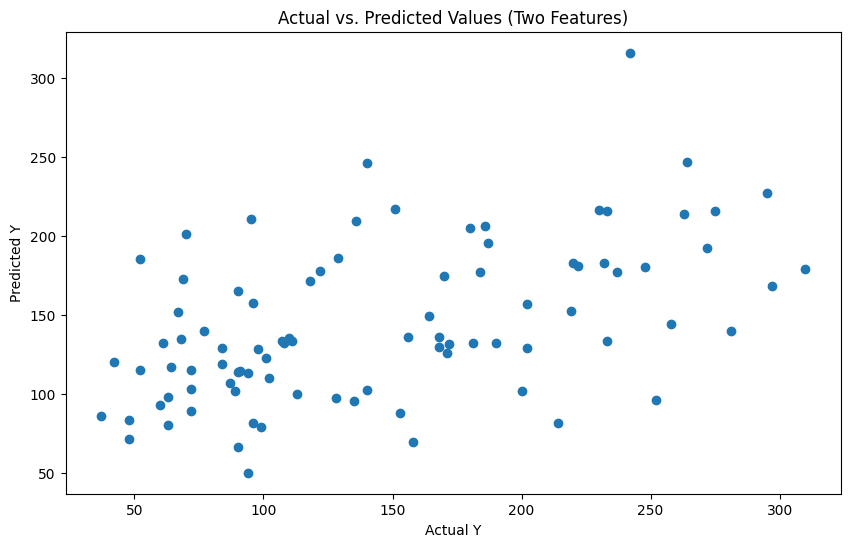

In [ ]:
# Choose two features (BMI and AGE) and target variable (Y)
X_two = df[['BMI', 'AGE']]
y = df['Y']

# Split the dataset
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two, y, test_size=0.2, random_state=42)

# Train the model
model_two = LinearRegression()
model_two.fit(X_train_two, y_train_two)

# Predict and evaluate
y_pred_train_two = model_two.predict(X_train_two)
y_pred_test_two = model_two.predict(X_test_two)

mse_train_two = mean_squared_error(y_train_two, y_pred_train_two)
mse_test_two = mean_squared_error(y_test_two, y_pred_test_two)
r2_train_two = r2_score(y_train_two, y_pred_train_two)
r2_test_two = r2_score(y_test_two, y_pred_test_two)

print(f"Two Feature Model (BMI, AGE): Train MSE = {mse_train_two}, Test MSE = {mse_test_two}")
print(f"Two Feature Model (BMI, AGE): Train R2 = {r2_train_two}, Test R2 = {r2_test_two}")

# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_two, y_pred_test_two)
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs. Predicted Values (Two Features)")
plt.show()


<br>

**Conclusions from the Output:**
<br>

**1. Scatter Plot and Correlation Analysis:**

Scatter plots and correlation analysis show relationships between features and the target variable (Y). Stronger correlations indicate more predictive power.

** 2. Describing what I am concluding from the output?**

<br>


The output includes both Mean Squared Error (MSE) and R-squared (R2) values for the linear regression models using single and two features.

<br>

**Single Feature Model (BMI):**

Train MSE: [3854.11265207582]

Test MSE: [4061.8259284949268]

Train R2: [0.3657241273794126]

Test R2: [0.23335039815872138]

<br>

**Two Feature Model (BMI, AGE):**

Train MSE: [3808.8578632933104]

Test MSE: [4052.775428111814]

Train R2: [0.37317176143593844]

Test R2: [0.235058635448385]



**3. From the MSE and R2, what do you infer?**

<br>

 **Inference from MSE and R2:**

 <br>

**Mean Squared Error (MSE):**
<br>

MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates better model performance. Comparing the train and test MSE values helps assess if the model is overfitting (very low train MSE and significantly higher test MSE) or underfitting (high MSE in both train and test).

<br>

**R-squared (R2):**
<br>

R2 indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R2 value closer to 1 suggests a better fit. Comparing train and test R2 values helps determine the model's generalization ability. If the train R2 is significantly higher than the test R2, it may indicate overfitting.




**4. How relevant were the features in getting the result?**
<br>

**Relevance of Features:**

<br>

**Single Feature (BMI):**


Using BMI as the sole predictor provides insights into how well BMI alone can predict the target variable (Y). The values of MSE and R2 for this model indicate the predictive power of BMI.

<br>

**Two Features (BMI, AGE):**

Including AGE along with BMI provides a broader context for predicting the target variable. Comparing the MSE and R2 values of this model with the single-feature model helps determine the added value of AGE. If the two-feature model significantly improves the MSE and R2, it suggests that AGE is a relevant and important feature in addition to BMI.

<br>

**Key Observations:**

<br>

**Model Performance:** If the two-feature model shows significantly better performance (lower MSE and higher R2) than the single-feature model, it indicates that both BMI and AGE together provide a better prediction than BMI alone.
<br>

**MSE and R2 Inference:** Lower MSE and higher R2 indicate better model performance.

<br>

**Feature Relevance:** The relevance of features is gauged by their impact on improving model performance. Significant improvement in the two-feature model suggests that both BMI and AGE are important predictors of the target variable.
<br>

**Feature Relevance:** BMI and AGE are relevant features for predicting the target variable.